# Introduction to Image Processing

author: Thomas Haslwanter\
date: April-2020

## Getting Ready

Most of the software typically used for image processing, like *scipy*, *scikit-image*, *PIL*,  already comes installed with the major Python distributions.

*[OpenCV](http://www.opencv.org/)*, however, (which is a terrific program but not necessaritly required for this Notebook) often has to be installed by hand:

- On Windows machines, it is best to download the corresponding compiled *OpenCV*-package from [Christoph Gohlke](http://www.lfd.uci.edu/~gohlke/pythonlibs/) to your machine, and install it with *pip install [package]*.
- On Linux machines (and also on OSC) you should use *Anaconda*, and install *OpenCV* with

    conda install -c menpo opencv3


**Note:** the *OpenCV*-version of Christoph Gohlke does not contain all modules. Especially, the module [bioinspired](http://docs.opencv.org/3.0-beta/modules/bioinspired/doc/bioinspired.html) - which is a simulation of the retina - is not included. The easiest way to get this one to run on a Windows machine is to use *Anaconda*, and install *OpenCV* as described above.

## Data Representation

Images are typically not represented as 64-bit float numbers. Instead, to save space, typically 8-bit unsigned integers are used, giving us 256 gray-levels. However, watch out when working with unsigned integers:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Watch out for overflow when working with unsigned integers!!
x = np.arange(10, dtype=np.uint8)
print(x+250)

[250 251 252 253 254 255   0   1   2   3]


### Where is up?

<img src="data\images\WhichWayUp.png" style="width: 600px;" align="left"/>

We are used to representing 2d maps with x/y coordinates, the first denoting horixontal, from left to right, and the second denoting vertical, from down to up.

However, when we index matrices, the first index denotes the rows, from top to bottom; and the second index the columns, from left to right:

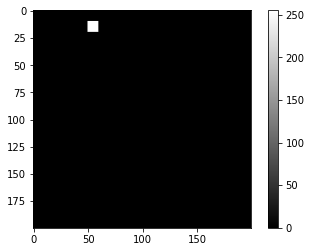

In [3]:
data = np.zeros((200,200), dtype=np.uint8)
data[10:20, 50:60]=255
plt.imshow(data)
plt.colorbar()
plt.gray()

#### Challenging orientations when using "ginput"

In [4]:
# Plot this into an external window, so that interactive selection is possible:
%matplotlib qt5

[[238. 290.]
 [353. 510.]]


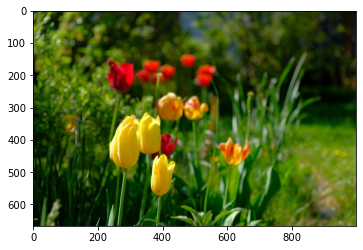

In [5]:
in_file = r'data\images\inMyGarden.jpg'
img = plt.imread(in_file)
plt.imshow(img)

# Tro to select the yellow flower in the front
selected = np.round(np.array(plt.ginput(2)))
print(np.round(selected))

The result should be approximately
[[216. 293.]
 [346. 523.]]

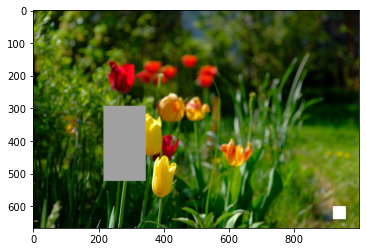

In [6]:
img_adjusted = img.copy()
img_adjusted[293:523, 216:346] = 160 # gray
img_adjusted[600:640, 920:960] = 255 # white
plt.imshow(img_adjusted)

In [7]:
# Back to inline images
%matplotlib inline

### Color representations

#### With Colormaps

gray() sets the colormap to "gray". Type help(colormaps) and CTRL+ENTER for more information.

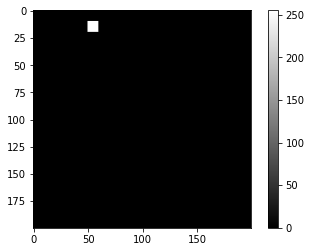

In [8]:
plt.gray()
plt.imshow(data)
plt.colorbar()
# in Matlab: imagesc()

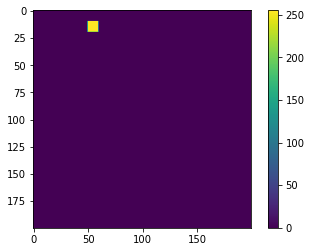

In [9]:
plt.viridis()
plt.imshow(data)
plt.colorbar()

#### As RGB (Red-Green-Blue)
Images which are represented in full color require a *red*, *green*, and *blue* (=RGB) channel, stacked up in a 3D-array:

(200, 200, 3)

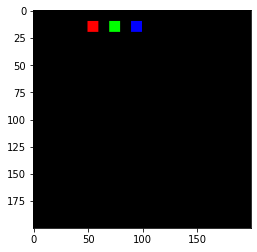

In [10]:
data_c = np.zeros((200,200,3), dtype=np.uint8)
data_c[10:20, 50:60, 0] = 255
data_c[10:20, 70:80, 1] = 255
data_c[10:20, 90:100, 2] = 255
plt.imshow(data_c)
data_c.shape

## Simple Image Manipulations

$R = \sqrt{x^2 + y^2}$

Note that you can use boolean expressions to address areas with specific properties in the image.

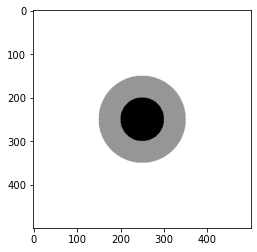

In [11]:
myrange = np.arange(-250,250)
X,Y = np.meshgrid(myrange, myrange)
Z = np.zeros(X.shape)

# Iris & pupil
R = np.sqrt(X**2+Y**2)   # in Matlab: replace "**" with ".^"
Z[R>50]=150
Z[R>100] = 255
plt.gray()
plt.imshow(Z)

The only tricky thing in the next step: I use "int32" to convert the result to integer (we can only set individual points), and use "250+..." to shift things into th middle of our plot.

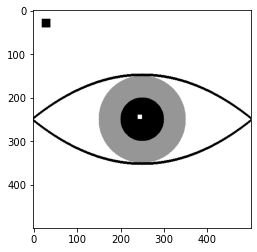

In [12]:
# Eyelids
polyPars = np.polyfit([-250, 0, 250], [0, 100, 0], 2)
x = np.arange(-250,250)
y = np.int32(np.polyval(polyPars, x))

lidThickness = 6
for ii in range(lidThickness):
    Z[ 250 + y+ii, 250 + x] = 1
    Z[ 250 - y-ii, 250 + x] = 1

# Add a few beauty spots
Z[20:40, 20:40] = 0
Z[240:250, 240:250] = 255
plt.imshow(Z)

### Saving a Figure

We can save the figure to PNG, JPEG, and other formats.

**Warning:** compressed image formats, e.g. JPEG, discard information by throwing away image details. Therefore they are not recommended for storing processed image data.

In [13]:
# Save the figure
print('Z has the shape {0}'.format(Z.shape))
outFile = 'test.png'
plt.imsave(outFile, Z)

Z has the shape (500, 500)


### Loading a Color Image

In [14]:
# Load the data again
# The 4th channel is used to indicate the alpha-transparency.

data = plt.imread(outFile)
print('"data" has the shape {0}'.format(data.shape))

"data" has the shape (500, 500, 4)


[5_IIR_Filters](5_IIR_Filters.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[5_ImgProc_Filters](5_ImgProc_Filters.ipynb)